Problem Statement: A Kaggle competition for a multi-class classification problem on text data - each text sample can belong to various classes. You must create a model which predicts the probability of each class for each text sample. The details can be found here - https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data

Data: You can use the training data provided in the Kaggle link. You may use a subset of data if you feel the data is too large. You can also split the data into training and validation sets.

Metrics:  You can choose to use the metric provided in the contest or you can use any other metric which you feel is suitable.


First I load the data on the notebook, then I try to check what is in the train.csv file to understand the data that is given to me


In [ ]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
train_data = pd.read_csv("/content/train.csv")

In [ ]:
len(train_data)
train_data.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


After understanding the data I am working with I will pre-process the data first by removing all the special characters and \n from the '*comment_text*' column.

- To remove special characters I am using regex

Then I will convert the text in lowercase so that any predications aren't affected by the case of the text.

I have also used .strip() to remove unnecessary spaces from the start and end of the string


In [ ]:
subset = train_data.head(10)

# Regex for special character removal
remove_special_chars = lambda text: re.sub(r'[^a-zA-Z0-9\s]', '', text)
subset['comment_text'] = ((subset['comment_text'].apply(remove_special_chars)).str.replace('\n', ' ')).str.lower().str.strip()
print(subset)

                 id                                       comment_text  toxic  \
0  0000997932d777bf  explanation why the edits made under my userna...      0   
1  000103f0d9cfb60f  daww he matches this background colour im seem...      0   
2  000113f07ec002fd  hey man im really not trying to edit war its j...      0   
3  0001b41b1c6bb37e  more i cant make any real suggestions on impro...      0   
4  0001d958c54c6e35  you sir are my hero any chance you remember wh...      0   
5  00025465d4725e87  congratulations from me as well use the tools ...      0   
6  0002bcb3da6cb337       cocksucker before you piss around on my work      1   
7  00031b1e95af7921  your vandalism to the matt shirvington article...      0   
8  00037261f536c51d  sorry if the word nonsense was offensive to yo...      0   
9  00040093b2687caa  alignment on this subject and which are contra...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0          

<ipython-input-98-d6dea0a40faa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['comment_text'] = ((subset['comment_text'].apply(remove_special_chars)).str.replace('\n', ' ')).str.lower().str.strip()


In [ ]:
#Applying the above chages to the actual dataset

train_data['comment_text'] = ((train_data['comment_text'].apply(remove_special_chars)).str.replace('\n', ' ')).str.lower()
train_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww he matches this background colour im seem...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really not trying to edit war its j...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i cant make any real suggestions on impr...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember wh...,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,and for the second time of asking when your vi...,0,0,0,0,0,0
159567,ffea4adeee384e90,you should be ashamed of yourself that is a ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,spitzer umm theres no actual article for pro...,0,0,0,0,0,0
159569,fff125370e4aaaf3,and it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
print(train_data['toxic'].unique())
print(train_data['severe_toxic'].unique())
print(train_data['obscene'].unique())
print(train_data['threat'].unique())
print(train_data['insult'].unique())
print(train_data['identity_hate'].unique())

[0 1]
[0 1]
[0 1]
[0 1]
[0 1]
[0 1]


Calculating the frequency of the labels

In [ ]:
selected_columns = ['toxic', 'severe_toxic', 'obscene','threat','insult', 'identity_hate']
column_totals = train_data[selected_columns].sum()
column_totals = pd.DataFrame({'Values': column_totals.index, 'Frequency': column_totals.values})
print(column_totals)

# sns.barplot(x='Values', y='Frequency', data=column_totals)
# sns.histplot(column_totals)

# # Set plot labels and title
# plt.xlabel('Values')
# plt.ylabel('Frequency')
# plt.title('Frequency of Values')



# # Display the plot
# plt.show()

          Values  Frequency
0          toxic      15294
1   severe_toxic       1595
2        obscene       8449
3         threat        478
4         insult       7877
5  identity_hate       1405


**Removal of Stopwords**

In [ ]:
import nltk
from nltk.corpus import stopwords

# Taking sample of the dataset to perform NLP techniques
subset_data = train_data.head(20000)

# Download the stopwords corpus (only required for the first time)
nltk.download('punkt')
nltk.download('stopwords')

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a given text
def remove_stop_words(text):
    # Tokenize the text into individual words
    words = nltk.word_tokenize(text)
    # Remove stop words from the list of words
    filtered_words = [word for word in words if word.lower() not in stop_words]
    # Join the filtered words back into a single text
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Apply the remove_stop_words function to the 'text' column
subset_data['comment_text'] = subset_data['comment_text'].apply(remove_stop_words)

print(subset_data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                     id                                       comment_text  \
0      0000997932d777bf  explanation edits made username hardcore metal...   
1      000103f0d9cfb60f  daww matches background colour im seemingly st...   
2      000113f07ec002fd  hey man im really trying edit war guy constant...   
3      0001b41b1c6bb37e  cant make real suggestions improvement wondere...   
4      0001d958c54c6e35                sir hero chance remember page thats   
...                 ...                                                ...   
19995  34d64209740b0f85  support asadullah two sentences describes pers...   
19996  34d6ee7f7dcd51a7      make lost faith wikipedia socalled neutrality   
19997  34d8be1f2b2ca6e5  notability dem 704 boyz tag placed dem 704 boy...   
19998  34d9bda5c0569a10  didnt anything wrong first placeyou accused so...   
19999  34da2eac2d871848  could explain private company could ever elimi...   

       toxic  severe_toxic  obscene  threat  insult  identity_h

<ipython-input-102-9ce90b9e4e02>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['comment_text'] = subset_data['comment_text'].apply(remove_stop_words)


In [ ]:
subset_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww matches background colour im seemingly st...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
19995,34d64209740b0f85,support asadullah two sentences describes pers...,0,0,0,0,0,0
19996,34d6ee7f7dcd51a7,make lost faith wikipedia socalled neutrality,0,0,0,0,0,0
19997,34d8be1f2b2ca6e5,notability dem 704 boyz tag placed dem 704 boy...,0,0,0,0,0,0
19998,34d9bda5c0569a10,didnt anything wrong first placeyou accused so...,1,0,0,0,0,0


**Stemming**

But it gives irrelevent and meaningless words so I dropped it

In [ ]:
dataStemming = subset_data.copy()
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

# Function to perform stemming on a given text
def perform_stemming(text):
    stemmed_words = [stemmer.stem(word) for word in nltk.word_tokenize(text)]
    return ' '.join(stemmed_words)

# Apply stemming to the 'comment_text' column
dataStemming['comment_text'] = dataStemming['comment_text'].apply(perform_stemming)
print(dataStemming)


## Dropped Stemming as it is giving senseless words which might affect the accuracy of the model, instead I decided to go ahead with lemmatization

                     id                                       comment_text  \
0      0000997932d777bf  explan edit made usernam hardcor metallica fan...   
1      000103f0d9cfb60f  daww match background colour im seemingli stuc...   
2      000113f07ec002fd  hey man im realli tri edit war guy constantli ...   
3      0001b41b1c6bb37e  cant make real suggest improv wonder section s...   
4      0001d958c54c6e35                    sir hero chanc rememb page that   
...                 ...                                                ...   
19995  34d64209740b0f85  support asadullah two sentenc describ person t...   
19996  34d6ee7f7dcd51a7            make lost faith wikipedia socal neutral   
19997  34d8be1f2b2ca6e5  notabl dem 704 boyz tag place dem 704 boyz req...   
19998  34d9bda5c0569a10  didnt anyth wrong first placey accus someth di...   
19999  34da2eac2d871848  could explain privat compani could ever elimin...   

       toxic  severe_toxic  obscene  threat  insult  identity_h

In [ ]:
subset_data

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww matches background colour im seemingly st...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestions improvement wondere...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
19995,34d64209740b0f85,support asadullah two sentences describes pers...,0,0,0,0,0,0
19996,34d6ee7f7dcd51a7,make lost faith wikipedia socalled neutrality,0,0,0,0,0,0
19997,34d8be1f2b2ca6e5,notability dem 704 boyz tag placed dem 704 boy...,0,0,0,0,0,0
19998,34d9bda5c0569a10,didnt anything wrong first placeyou accused so...,1,0,0,0,0,0


**Lemmatization**

This gives us sensible words to perform further analysis

In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

dataLem = subset_data.copy()

# Create an instance of the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on a given text
def perform_lemmatization(text):
    lemmatized_words = [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text)]
    return ' '.join(lemmatized_words)

# Apply lemmatization to the 'comment_text' column
dataLem['comment_text'] = dataLem['comment_text'].apply(perform_lemmatization)

dataLem.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0
1,000103f0d9cfb60f,daww match background colour im seemingly stuc...,0,0,0,0,0,0
2,000113f07ec002fd,hey man im really trying edit war guy constant...,0,0,0,0,0,0
3,0001b41b1c6bb37e,cant make real suggestion improvement wondered...,0,0,0,0,0,0
4,0001d958c54c6e35,sir hero chance remember page thats,0,0,0,0,0,0


In [ ]:
print((pd.concat([dataLem,subset_data]).drop_duplicates(keep=False)))

print(len(dataLem) + len(subset_data))

                     id                                       comment_text  \
0      0000997932d777bf  explanation edits made username hardcore metal...   
1      000103f0d9cfb60f  daww match background colour im seemingly stuc...   
3      0001b41b1c6bb37e  cant make real suggestion improvement wondered...   
5      00025465d4725e87             congratulation well use tool well talk   
8      00037261f536c51d  sorry word nonsense offensive anyway im intend...   
...                 ...                                                ...   
19987  34ce23e3e17f85db                         players recieving detailed   
19989  34d0d2265cb6780f  lines page 270275 dont see read asserts youre ...   
19990  34d1479374070280  however think stated positions issues often en...   
19995  34d64209740b0f85  support asadullah two sentences describes pers...   
19997  34d8be1f2b2ca6e5  notability dem 704 boyz tag placed dem 704 boy...   

       toxic  severe_toxic  obscene  threat  insult  identity_h

**Splitting test data and train data**

In [ ]:
## Without Lemmetization

cols_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
X_train, X_test, y_train, y_test = train_test_split(subset_data['comment_text'], subset_data[cols_target], test_size= 0.3)

## With Lemmetization

cols_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
X_train_Lem, X_test_Lem, y_train_Lem, y_test_Lem = train_test_split(dataLem['comment_text'], dataLem[cols_target], test_size= 0.3)

In [ ]:
X_train

10952    never heard examples listed article example ei...
4061     sure id flattered used dont know found page wi...
15806    thanks noticed article page doesnt big scary r...
18363                                      looking support
399      capitalization please stop changing lowercase ...
                               ...                        
14318    homosexual fuck people ass hire prostitutes mo...
795      although doesnt extend modern era might want l...
9307     link reliable sources verifiablity get please ...
2652     understand difficulty able read language wikis...
4169     know request citation certainly problem sudden...
Name: comment_text, Length: 14000, dtype: object

**Performing TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Without Lemmetization

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


#With Lemmetization

vectorizer_Lem = TfidfVectorizer()
X_train_tfidf_Lem = vectorizer_Lem.fit_transform(X_train_Lem)
X_test_tfidf_Lem = vectorizer_Lem.transform(X_test_Lem)

In [ ]:
X_train_tfidf

<14000x50382 sparse matrix of type '<class 'numpy.float64'>'
	with 393709 stored elements in Compressed Sparse Row format>

In [ ]:
import tensorflow as tf
if tf.test.gpu_device_name():
    print('GPU is available')
else:
    print('GPU is not available')
tf.config.experimental.set_memory_growth(tf.config.experimental.list_physical_devices('GPU')[0], True)

GPU is available


In [ ]:
print(X_train_tfidf)

  (0, 39503)	0.2610951009157925
  (0, 41051)	0.3753293526159004
  (0, 19487)	0.30206498747797156
  (0, 8612)	0.21868484049844863
  (0, 33426)	0.3524006723796167
  (0, 25270)	0.2610951009157925
  (0, 15387)	0.19211655155563748
  (0, 16496)	0.19735416379257895
  (0, 5246)	0.10789463033783245
  (0, 26567)	0.2162932120021366
  (0, 16501)	0.2552319470232185
  (0, 20636)	0.47687492292894346
  (0, 30326)	0.18083015384991138
  (1, 8408)	0.16916166162247076
  (1, 48406)	0.22717637224063353
  (1, 33479)	0.24016078752753217
  (1, 46534)	0.11425089198798694
  (1, 39488)	0.12467710096364577
  (1, 21462)	0.20492328013320382
  (1, 45218)	0.2504670977498154
  (1, 27782)	0.667626101491104
  (1, 12800)	0.2504670977498154
  (1, 45216)	0.20492328013320382
  (1, 8984)	0.15800515546988173
  (1, 48559)	0.17630177570110026
  :	:
  (13998, 2793)	0.11209305549316766
  (13998, 18080)	0.11571650895699274
  (13998, 11643)	0.0792073177826982
  (13998, 13710)	0.09958357104519186
  (13998, 48894)	0.16931315566109115


Using different models and checking it's performance and deciding the model most suited based on the accuracy

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Without Lemmetization

ovr_classifier = OneVsRestClassifier(LogisticRegression())
ovr_classifier.fit(X_train_tfidf,y_train)
y_pred = ovr_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy LogisticRegression:", accuracy)

ovr_classifier_multi = OneVsRestClassifier(MultinomialNB())
ovr_classifier_multi.fit(X_train_tfidf,y_train)
y_pred = ovr_classifier_multi.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
print("AccuracyMultinominal:", accuracy)

## With Lemmetization

ovr_classifier_Lem = OneVsRestClassifier(LogisticRegression())
ovr_classifier_Lem.fit(X_train_tfidf_Lem,y_train_Lem)
y_pred = ovr_classifier_Lem.predict(X_test_tfidf_Lem)

accuracy = accuracy_score(y_test_Lem, y_pred)
print("Accuracy LogisticRegression with Lemmetization:", accuracy)


ovr_classifier_Lem = OneVsRestClassifier(MultinomialNB())
ovr_classifier_Lem.fit(X_train_tfidf_Lem,y_train_Lem)
y_pred = ovr_classifier_Lem.predict(X_test_tfidf_Lem)

accuracy = accuracy_score(y_test_Lem, y_pred)
print("Accuracy Multinominal with Lemmetization::", accuracy)

# Logistic Regression

logistic_regression_model = LogisticRegression()

for labels in y_train:
  logistic_regression_model.fit(X_train_tfidf,y_train[labels])
  y_pred_LR = logistic_regression_model.predict(X_test_tfidf)

  accuracy = accuracy_score(y_test[labels], y_pred_LR)
  print("Accuracy Logistic Regression for label "+ labels +"without Lemmetization:", accuracy)


# Multinomial NB

multinomial_model = MultinomialNB()

for labels in y_train:
  multinomial_model.fit(X_train_tfidf,y_train[labels])
  y_pred_MN = multinomial_model.predict(X_test_tfidf)

  accuracy = accuracy_score(y_test[labels], y_pred_MN)
  print("Accuracy Multinomial Navie Bayes for label "+ labels +" without Lemmetization:", accuracy)


# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=30)
for labels in y_train:
  rf_classifier.fit(X_train_tfidf,y_train[labels])
  y_pred_RF = rf_classifier.predict(X_test_tfidf)

  accuracy = accuracy_score(y_test[labels], y_pred_RF)
  print("Accuracy Random Forest for label "+ labels +" without Lemmetization:", accuracy)

# Random Forest with onevsrestClassifier

base_classifier = RandomForestClassifier(n_estimators=150, random_state=40)
ovr_classifier = OneVsRestClassifier(base_classifier)
ovr_classifier.fit(X_train_tfidf,y_train)
y_pred_RFO = ovr_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred_RFO)
print("Accuracy Random Forest with OneVsRest Classifier without Lemmetization:", accuracy)

Accuracy LogisticRegression: 0.9025
AccuracyMultinominal: 0.895
Accuracy LogisticRegression with Lemmetization: 0.9036666666666666
Accuracy Multinominal with Lemmetization:: 0.8955
Accuracy Logistic Regression for label toxicwithout Lemmetization: 0.933
Accuracy Logistic Regression for label severe_toxicwithout Lemmetization: 0.9891666666666666
Accuracy Logistic Regression for label obscenewithout Lemmetization: 0.9678333333333333
Accuracy Logistic Regression for label threatwithout Lemmetization: 0.9971666666666666
Accuracy Logistic Regression for label insultwithout Lemmetization: 0.9591666666666666
Accuracy Logistic Regression for label identity_hatewithout Lemmetization: 0.994
Accuracy Multinomial Navie Bayes for label toxic without Lemmetization: 0.9093333333333333
Accuracy Multinomial Navie Bayes for label severe_toxic without Lemmetization: 0.9896666666666667
Accuracy Multinomial Navie Bayes for label obscene without Lemmetization: 0.9516666666666667
Accuracy Multinomial Navie B

In [ ]:
# Random Forest with onevsrestClassifier

base_classifier = RandomForestClassifier(n_estimators=600, random_state=100)
ovr_classifier = OneVsRestClassifier(base_classifier)
ovr_classifier.fit(X_train_tfidf,y_train)
y_pred_RFO = ovr_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred_RFO)
print("Accuracy Random Forest with OneVsRest Classifier without Lemmetization:", accuracy)

Accuracy Random Forest with OneVsRest Classifier without Lemmetization: 0.9096666666666666


**Based on the Results above I found that using RandomForestClassifier as base Classifier and along with OneVsRestClassifier gives us the best result**

Further we try to tune RandomForestClassifier to get efficient performance.

Also if we use the data without lemmatization gives us better results so I use the one without Lemmatization.

**RandomForestClassifier gives best performance with nestimaters = 100 as we can see in the plot**

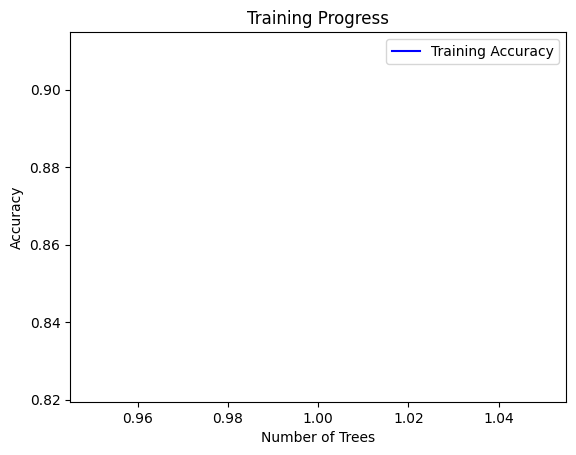

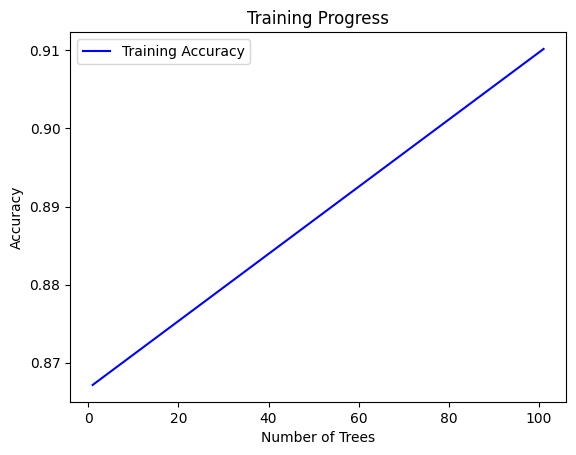

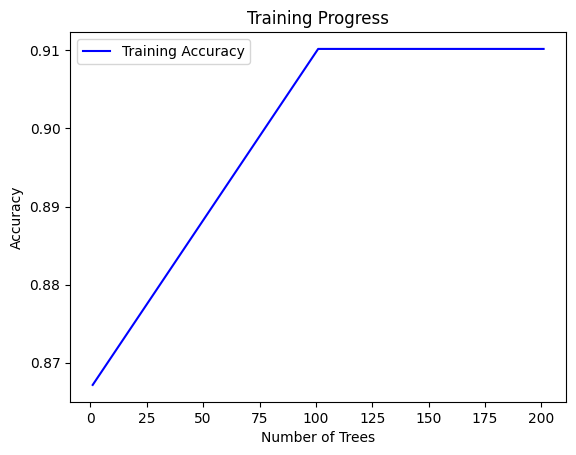

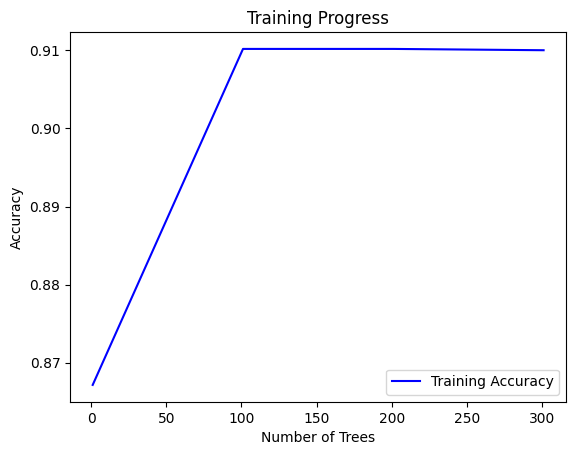

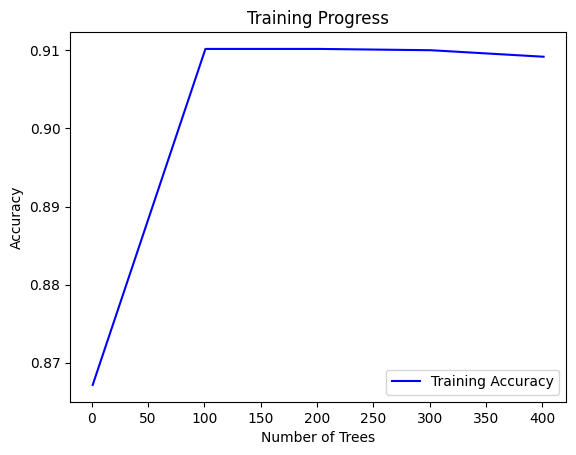

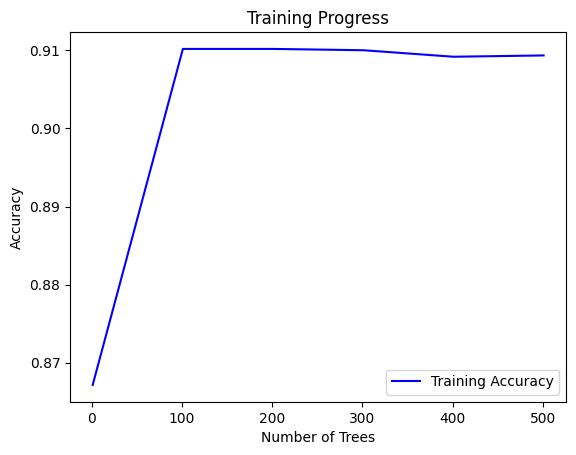

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=600, random_state =100)

# Lists to store the performance metrics
train_acc = []
test_acc = []

# Training loop
for i in range(1, 600, 100):
    # Train the random forest classifier with i trees
    rf_classifier.set_params(n_estimators=i, random_state =100)
    rf_classifier.fit(X_train_tfidf,y_train)

    # Calculate the training accuracy
    y_train_pred = rf_classifier.predict(X_test_tfidf)
    train_accuracy = accuracy_score(y_test, y_train_pred)
    train_acc.append(train_accuracy)

    # Plot the training progress
    plt.plot(range(1, i+100, 100), train_acc, 'b-', label='Training Accuracy')
    # plt.plot(range(1, i+1), test_acc, 'r-', label='Testing Accuracy')

    plt.xlabel('Number of Trees')
    plt.ylabel('Accuracy')
    plt.title('Training Progress')
    plt.legend()

    # Update the plot
    plt.pause(0.01)

# Show the final plot
plt.show()


In [ ]:
test_data = pd.read_csv("/content/test.csv")
test_data

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

train_data = pd.read_csv("/content/train.csv")

remove_special_chars = lambda text: re.sub(r'[^a-zA-Z0-9\s]', '', text)

train_data['comment_text'] = ((train_data['comment_text'].apply(remove_special_chars)).str.replace('\n', ' ')).str.lower()

# Download the stopwords corpus
nltk.download('punkt')
nltk.download('stopwords')

# Get the set of stopwords
stop_words = set(stopwords.words('english'))

# Function to remove stop words from a given text
def remove_stop_words(text):
    words = nltk.word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Apply the remove_stop_words function to the 'comment_text' column
train_data['comment_text'] = train_data['comment_text'].apply(remove_stop_words)

cols_target = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
X_train, X_test, y_train, y_test = train_test_split(train_data['comment_text'], train_data[cols_target], test_size= 0.3)

#Without Lemmetization

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Training the model on the actual dataset
base_classifier = RandomForestClassifier(n_estimators=100, random_state=100)
ovr_classifier = OneVsRestClassifier(base_classifier)
ovr_classifier.fit(X_train_tfidf,y_train)
y_pred_RFO = ovr_classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred_RFO)
print("Accuracy Random Forest with OneVsRest Classifier without Lemmetization:", accuracy)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Accuracy Random Forest with OneVsRest Classifier without Lemmetization: 0.9151069518716578


**References:**
1. Analytics vidya to find the model best suited and how to work with model and Text related problems

2. Took help from Kaggle Notebooks to understand what approach to follow.

3. Took help of ChatGPT/Stackoverflow to solve errors that I entountered